## EECE5644 Assignment4 - Question 2 

#### Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from skimage import io, transform, data
from skimage.util import img_as_float
import os

# Configure plot style
plt.rcParams['figure.figsize'] = (12, 6)

#### Image loading

In [9]:
def load_and_preprocess_image(image_path=None, scale_factor=0.3):
    if image_path:
        try:
            # Load user image
            img = io.imread(image_path)
            # Remove alpha channel if present
            if img.shape[-1] == 4:
                img = img[:, :, :3]
        except Exception as e:
            print(f"Error loading image: {e}. Using sample image instead.")
            img = data.chelsea()
    else:
        # Use sample image from skimage (Chelsea the cat)
        img = data.chelsea()

    # Downsample image to reduce computation time 
    img = transform.rescale(img, scale_factor, anti_aliasing=True, channel_axis=-1)
    
    # Ensure image is in [0, 1] range (float) for color normalization
    img = img_as_float(img)
    
    rows, cols, channels = img.shape
    print(f"Processing Image. Shape: {img.shape} (Pixels: {rows*cols})")

    # Features: [row_idx, col_idx, R, G, B]
    row_indices, col_indices = np.indices((rows, cols))
    
    # Flatten arrays
    r_flat = row_indices.ravel()
    c_flat = col_indices.ravel()
    rgb_flat = img.reshape(-1, 3) # (N, 3)
    
    # Normalize features to [0, 1] 
    r_norm = r_flat / (rows - 1)
    c_norm = c_flat / (cols - 1)
    
    # Stack into (N, 5) matrix
    features = np.column_stack((r_norm, c_norm, rgb_flat))
    
    return img, features

current_dir = os.path.dirname(os.path.abspath(__vsc_ipynb_file__))
image_p = os.path.join(current_dir, "97033.jpg")
original_img, X_features = load_and_preprocess_image(image_path=image_p, scale_factor=0.2)

print(f"Feature Matrix Shape: {X_features.shape}")
print(f"Feature Min/Max: {X_features.min(axis=0)}, {X_features.max(axis=0)}")

Processing Image. Shape: (64, 96, 3) (Pixels: 6144)
Feature Matrix Shape: (6144, 5)
Feature Min/Max: [0.         0.         0.03068534 0.04728537 0.04752996], [1.         1.         0.99840059 0.99911248 0.99962397]


#### GMM Model Selection (Cross-Validation)

Starting Model Selection with 3-Fold CV...
Testing n_components = 2...


C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


  -> Avg Validation Log-Likelihood: 5.4916
Testing n_components = 3...


C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


  -> Avg Validation Log-Likelihood: 5.8351
Testing n_components = 4...


C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Win

  -> Avg Validation Log-Likelihood: 6.0222
Testing n_components = 5...


C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


  -> Avg Validation Log-Likelihood: 6.2015
Testing n_components = 6...


C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\dawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


  -> Avg Validation Log-Likelihood: 6.3836
----------------------------------------
Selected Optimal Number of Components: 6
----------------------------------------


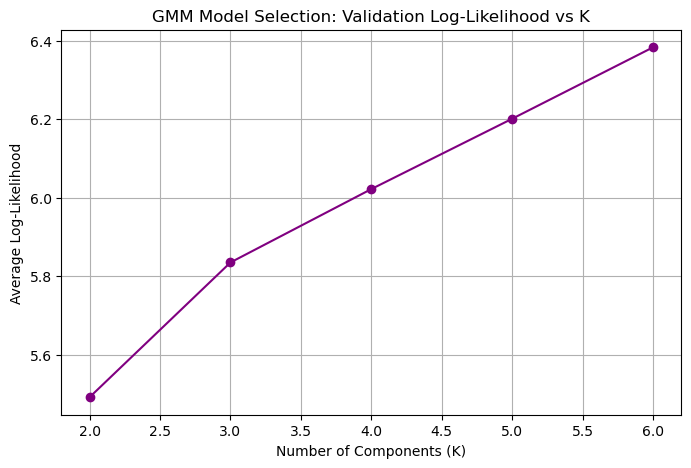

In [10]:
def select_best_gmm(X, n_components_list, n_splits=5):
    print(f"Starting Model Selection with {n_splits}-Fold CV...")
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mean_scores = []
    
    for k in n_components_list:
        print(f"Testing n_components = {k}...")
        fold_scores = []
        
        # Cross-validation loop
        for train_idx, val_idx in kf.split(X):
            # Split data
            X_train, X_val = X[train_idx], X[val_idx]
            
            # Fit GMM
            gmm = GaussianMixture(n_components=k, covariance_type='full', 
                                  max_iter=100, random_state=42)
            gmm.fit(X_train)
            
            # Evaluate log-likelihood on validation set
            score = gmm.score(X_val) # Returns per-sample average log-likelihood
            fold_scores.append(score)
            
        avg_score = np.mean(fold_scores)
        mean_scores.append(avg_score)
        print(f"  -> Avg Validation Log-Likelihood: {avg_score:.4f}")
        
    # Find best K
    best_idx = np.argmax(mean_scores)
    best_k = n_components_list[best_idx]
    
    return best_k, mean_scores

# Test a range of components (e.g., 2 to 6). 
n_components_range = [2, 3, 4, 5, 6]

best_k, cv_scores = select_best_gmm(X_features, n_components_range, n_splits=3)

print("-" * 40)
print(f"Selected Optimal Number of Components: {best_k}")
print("-" * 40)

# Plot CV Results
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, cv_scores, marker='o', linestyle='-', color='purple')
plt.title("GMM Model Selection: Validation Log-Likelihood vs K")
plt.xlabel("Number of Components (K)")
plt.ylabel("Average Log-Likelihood")
plt.grid(True)
plt.show()

#### Final Segmentation and Visualization

Fitting final GMM with K=6 on full image data...


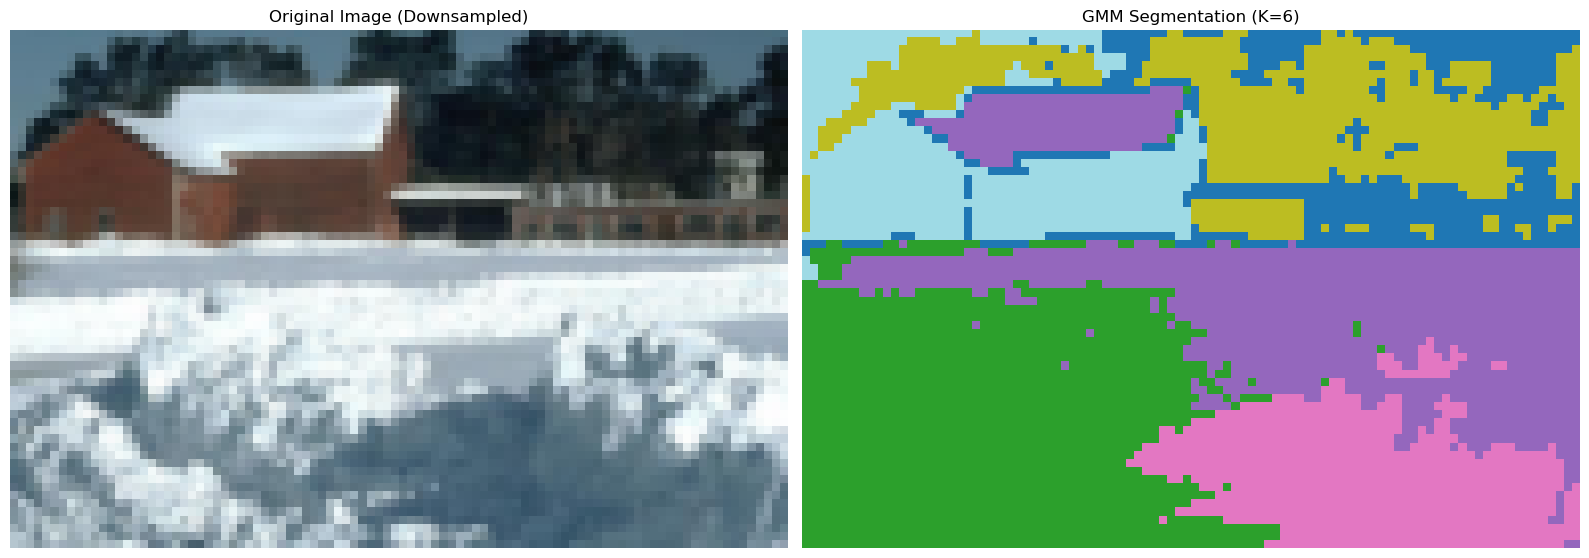

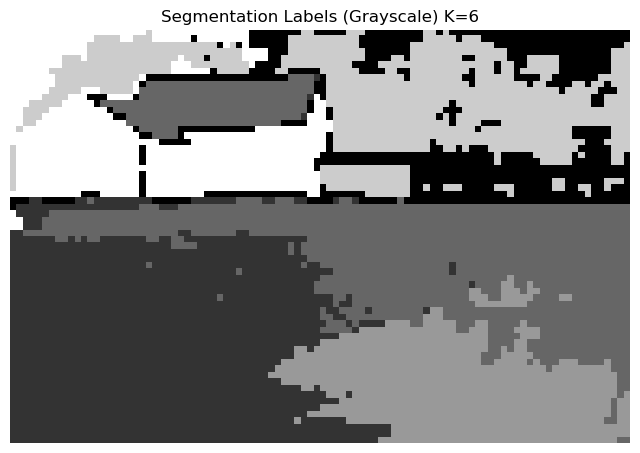

In [11]:
print(f"Fitting final GMM with K={best_k} on full image data...")

# Fit the final model with the optimal K
final_gmm = GaussianMixture(n_components=best_k, covariance_type='full', 
                            max_iter=150, random_state=42)
final_gmm.fit(X_features)

# Predict most likely component label for each pixel 
labels = final_gmm.predict(X_features)

# Reshape labels back to original image dimensions
h, w = original_img.shape[:2]
segmentation_map = labels.reshape(h, w)

# Display the original image and the segmentation side by side 

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original Image
axes[0].imshow(original_img)
axes[0].set_title("Original Image (Downsampled)")
axes[0].axis('off')

# Segmentation Map
axes[1].imshow(segmentation_map, cmap='tab20')
axes[1].set_title(f"GMM Segmentation (K={best_k})")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show Grayscale version if required by 
plt.figure(figsize=(8, 6))
plt.imshow(segmentation_map, cmap='gray')
plt.title(f"Segmentation Labels (Grayscale) K={best_k}")
plt.axis('off')
plt.show()